In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Enable inline plotting
%matplotlib inline


In [3]:
data = pd.read_csv("cost_of_living_us.csv")
print("Dataset Information:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_inc

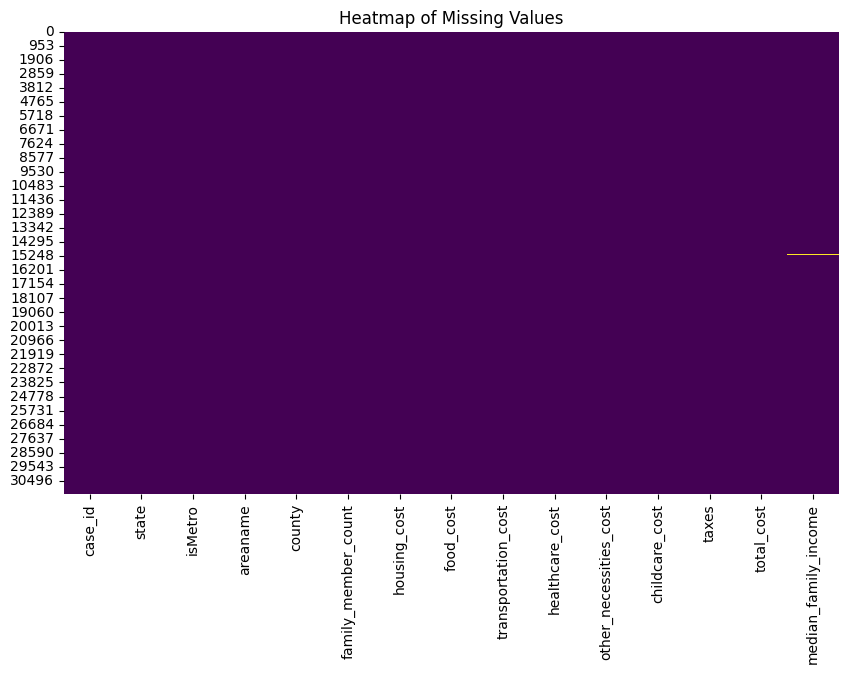

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()


In [5]:
# Fill missing values in 'median_family_income' with the median
data['median_family_income'] = data['median_family_income'].fillna(data['median_family_income'].median())


In [6]:
# Identify categorical columns
categorical_columns = ['state', 'areaname', 'county', 'family_member_count']

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Print dataset dimensions before and after encoding
print(f"Original Dataset Dimensions: {data.shape}")
print(f"Encoded Dataset Dimensions: {data_encoded.shape}")


Original Dataset Dimensions: (31430, 15)
Encoded Dataset Dimensions: (31430, 4506)


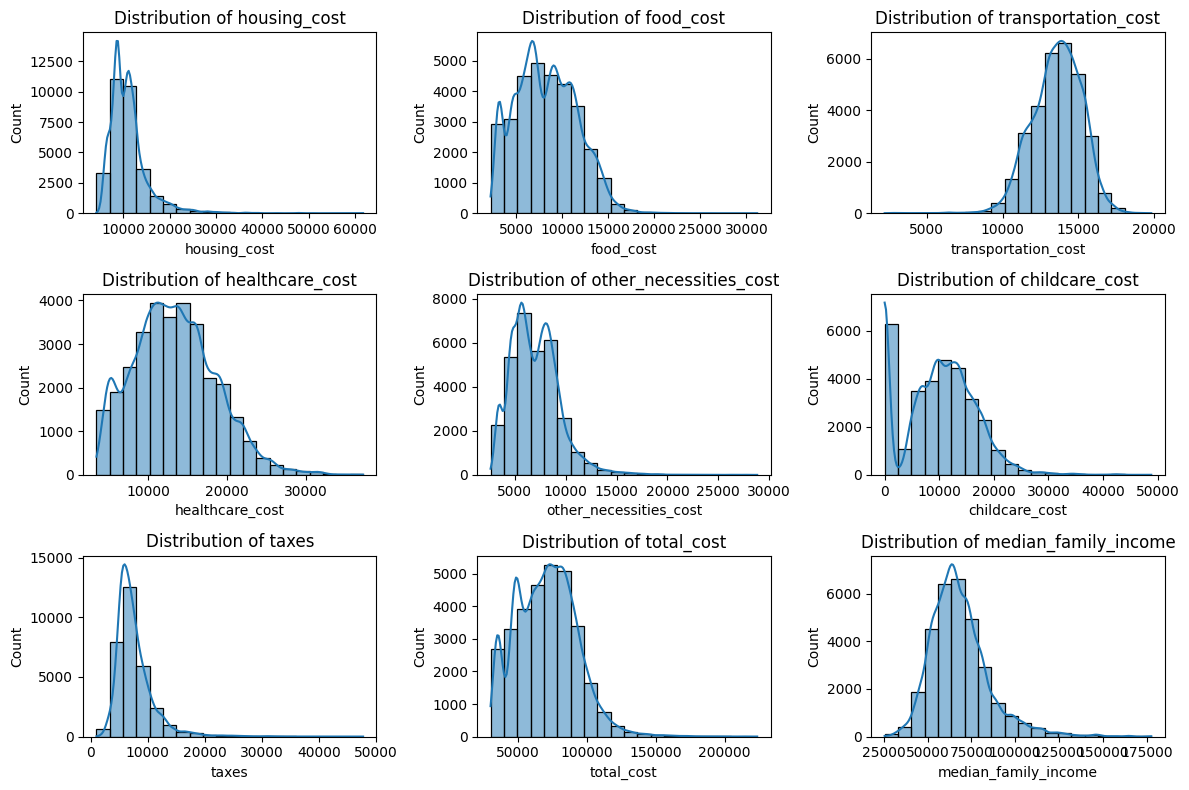

In [7]:
# Identify numerical features
numerical_features = ['housing_cost', 'food_cost', 'transportation_cost',
                      'healthcare_cost', 'other_necessities_cost',
                      'childcare_cost', 'taxes', 'total_cost', 'median_family_income']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


In [8]:
# Scale numerical features
scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])


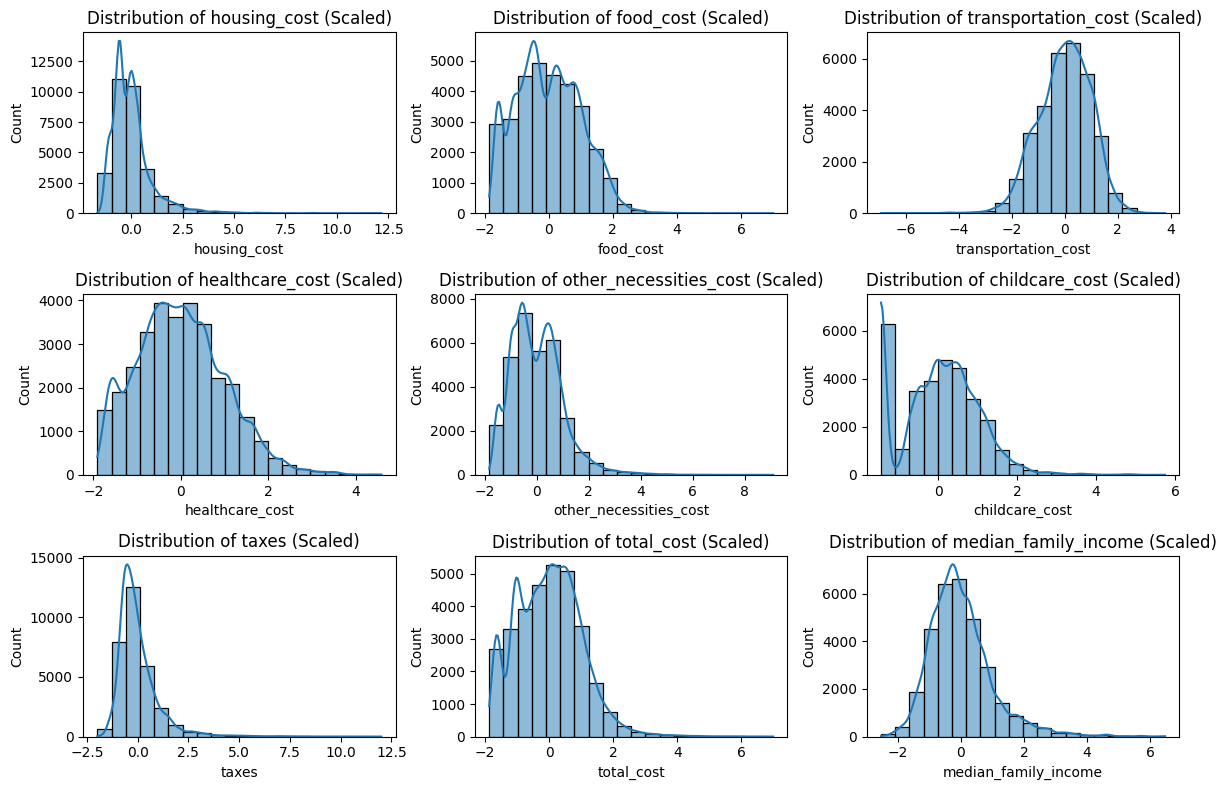

In [9]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_encoded[column], kde=True, bins=20)
    plt.title(f"Distribution of {column} (Scaled)")
plt.tight_layout()
plt.show()


In [10]:
# Drop unnecessary columns
columns_to_drop = ['case_id', 'isMetro']
data_cleaned = data_encoded.drop(columns=columns_to_drop)


In [11]:
# Verify cleaned dataset
print("\nCleaned Dataset Information:")
print(data_cleaned.info())

print("\nFirst Few Rows of Cleaned Dataset:")
print(data_cleaned.head())



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Columns: 4504 entries, housing_cost to family_member_count_2p4c
dtypes: bool(4495), float64(9)
memory usage: 136.9 MB
None

First Few Rows of Cleaned Dataset:
   housing_cost  food_cost  transportation_cost  healthcare_cost  \
0     -0.616473  -1.477364            -1.685343        -1.471151   
1      0.238583  -0.976983            -1.222645        -0.909695   
2      0.238583  -0.252913            -0.751071        -0.348239   
3      1.004306   0.508924            -0.086362         0.213216   
4      1.004306   1.190646             0.091892         0.774672   

   other_necessities_cost  childcare_cost     taxes  total_cost  \
0               -1.118516       -1.457571 -0.378703   -1.448656   
1               -0.332805       -0.550559 -0.070555   -0.627448   
2                0.025169        0.877104  0.632338    0.239829   
3                0.883898        1.316384  1.630062    1.0

In [12]:
# Save the preprocessed dataset
data_cleaned.to_csv("preprocessed_cost_of_living.csv", index=False)
print("\nPreprocessed data saved as 'preprocessed_cost_of_living.csv'.")



Preprocessed data saved as 'preprocessed_cost_of_living.csv'.
